In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('titanic_passengers.csv')

# Create survival category for easier visualization
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

In [3]:
print("=== TITANIC SURVIVAL ANALYSIS ===")
print(f"Total passengers: {len(df)}")
print(f"Overall survival rate: {df['Survived'].mean():.1%}")
print()

=== TITANIC SURVIVAL ANALYSIS ===
Total passengers: 891
Overall survival rate: 38.4%



1. SURVIVAL BY SEX
        Total  Survived  Survival_Rate
Sex                                   
female    314       233          0.742
male      577       109          0.189


C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\2546846910.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', ci=None)


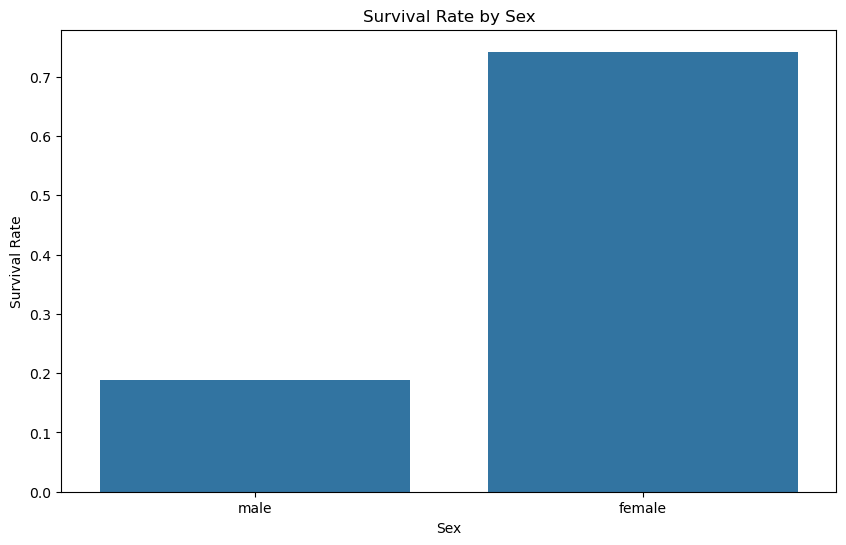

In [15]:
# 1. SURVIVAL BY SEX
print("1. SURVIVAL BY SEX")
sex_survival = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']).round(3)
sex_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(sex_survival)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sex', y='Survived', ci=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()


2. SURVIVAL BY PASSENGER CLASS
        Total  Survived  Survival_Rate
Pclass                                
1         216       136          0.630
2         184        87          0.473
3         491       119          0.242


C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\1401932795.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', ci=None)


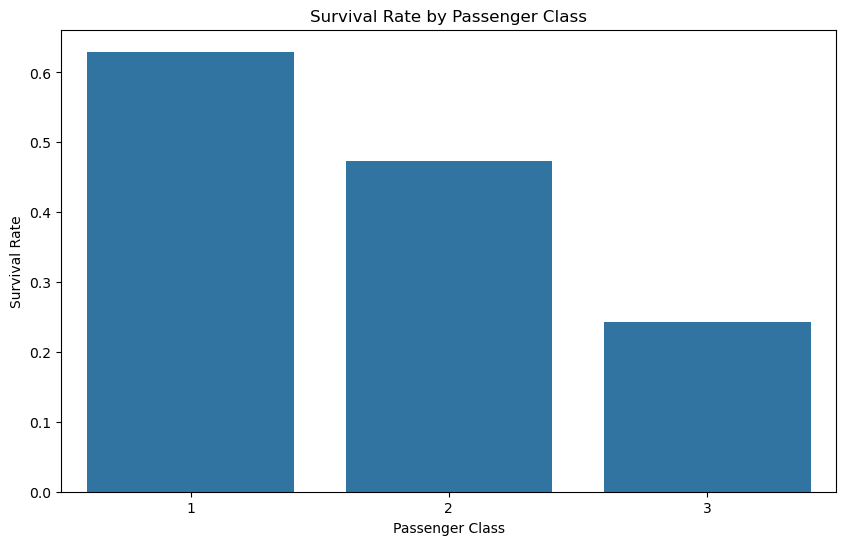

In [5]:
# 2. SURVIVAL BY PASSENGER CLASS
print("\n2. SURVIVAL BY PASSENGER CLASS")
class_survival = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']).round(3)
class_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(class_survival)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived', ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()


3. AGE ANALYSIS
             Total  Survived  Survival_Rate
Age_Group                                  
Child           69        40          0.580
Teen            70        30          0.429
Young Adult    358       137          0.383
Adult          195        78          0.400
Elder           22         5          0.227


C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\3120395490.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean']).round(3)
C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\3120395490.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df.dropna(subset=['Age_Group']), x='Age_Group', y='Survived', ci=None)


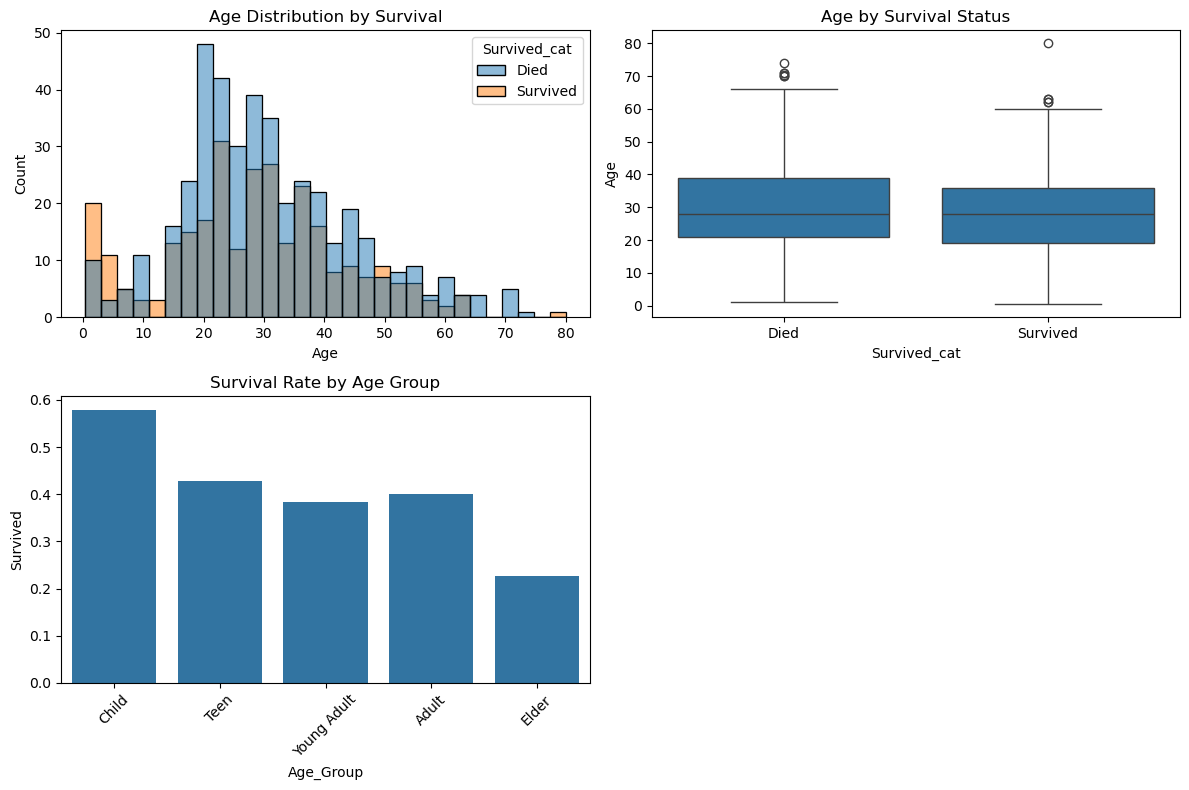

In [6]:
# 3. AGE ANALYSIS
print("\n3. AGE ANALYSIS")
# Create age categories for analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Elder'])

age_survival = df.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean']).round(3)
age_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(age_survival)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', hue='Survived_cat', bins=30)
plt.title('Age Distribution by Survival')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Survived_cat', y='Age')
plt.title('Age by Survival Status')

plt.subplot(2, 2, 3)
sns.barplot(data=df.dropna(subset=['Age_Group']), x='Age_Group', y='Survived', ci=None)
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


4. FARE ANALYSIS
            Total  Survived  Survival_Rate
Fare_Group                                
Low           321        66          0.206
Medium        321       139          0.433
High          181        97          0.536
Very High      53        39          0.736


C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\3999305651.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('Fare_Group')['Survived'].agg(['count', 'sum', 'mean']).round(3)
C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\3999305651.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df.dropna(subset=['Fare_Group']), x='Fare_Group', y='Survived', ci=None)


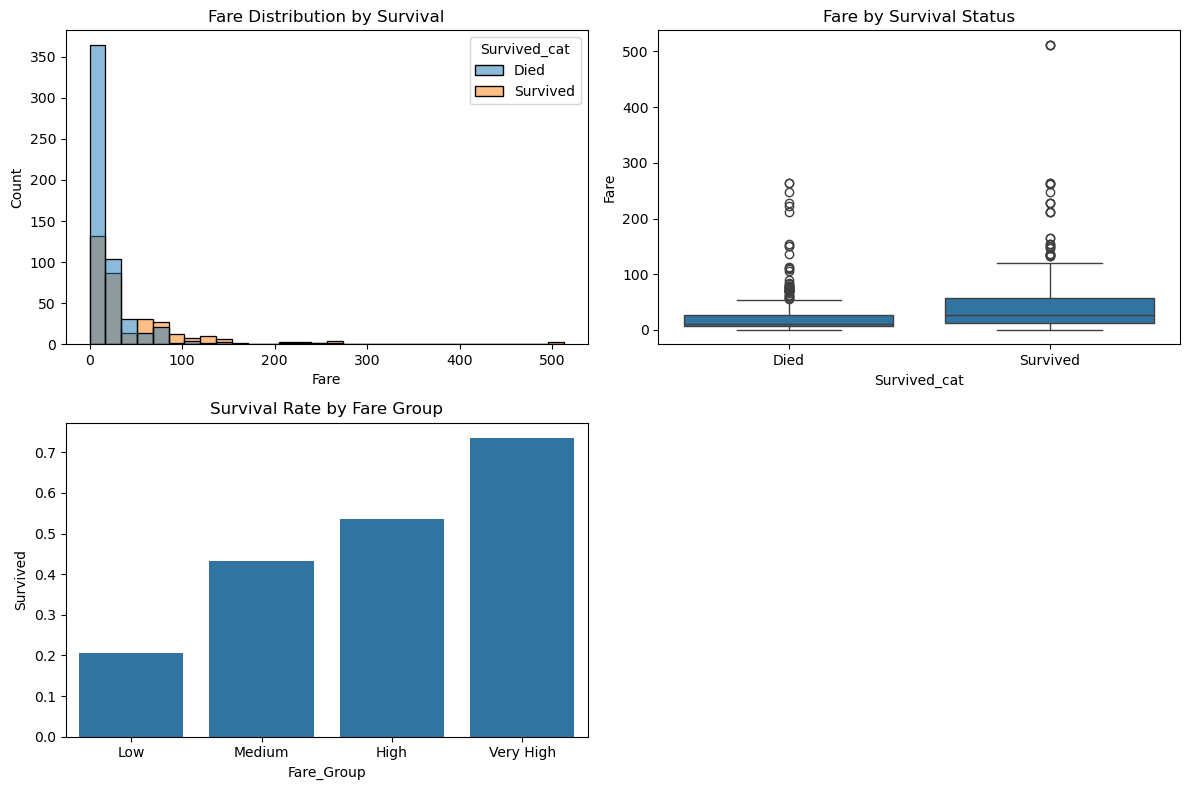

In [7]:
# 4. FARE ANALYSIS
print("\n4. FARE ANALYSIS")
# Create fare categories
df['Fare_Group'] = pd.cut(df['Fare'], bins=[0, 10, 30, 100, 600], 
                         labels=['Low', 'Medium', 'High', 'Very High'])

fare_survival = df.groupby('Fare_Group')['Survived'].agg(['count', 'sum', 'mean']).round(3)
fare_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(fare_survival)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Fare', hue='Survived_cat', bins=30)
plt.title('Fare Distribution by Survival')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Survived_cat', y='Fare')
plt.title('Fare by Survival Status')

plt.subplot(2, 2, 3)
sns.barplot(data=df.dropna(subset=['Fare_Group']), x='Fare_Group', y='Survived', ci=None)
plt.title('Survival Rate by Fare Group')

plt.tight_layout()
plt.show()


5. FAMILY SIZE ANALYSIS
                 Total  Survived  Survival_Rate
Family_Category                                
Alone              537       163          0.304
Large Family        91        31          0.341
Small Family       263       148          0.563


C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\995513377.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Family_Category', y='Survived', ci=None)


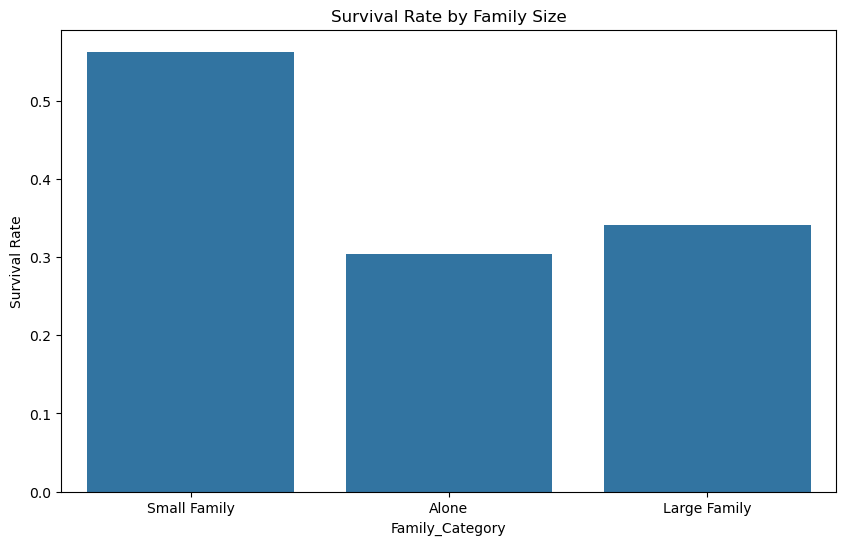

In [8]:
# 5. FAMILY SIZE ANALYSIS (SibSp + Parch)
print("\n5. FAMILY SIZE ANALYSIS")
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Category'] = df['Family_Size'].apply(lambda x: 'Alone' if x == 0 
                                               else 'Small Family' if x <= 2 
                                               else 'Large Family')

family_survival = df.groupby('Family_Category')['Survived'].agg(['count', 'sum', 'mean']).round(3)
family_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(family_survival)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Family_Category', y='Survived', ci=None)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()



6. PORT OF EMBARKATION
          Total  Survived  Survival_Rate
Embarked                                
C           168        93          0.554
Q            77        30          0.390
S           644       217          0.337


C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\4150050911.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df.dropna(subset=['Embarked']), x='Embarked', y='Survived', ci=None)


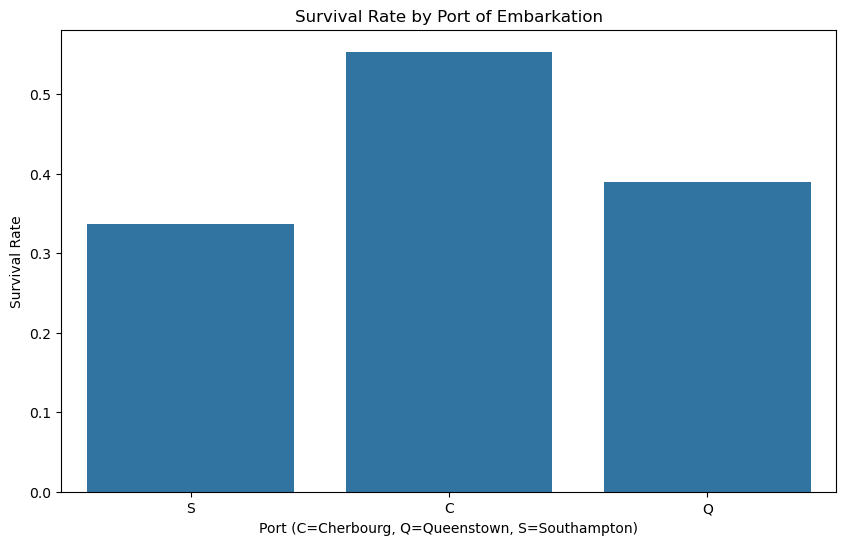

In [10]:
# 6. PORT OF EMBARKATION
print("\n6. PORT OF EMBARKATION")
embark_survival = df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean']).round(3)
embark_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(embark_survival)
plt.figure(figsize=(10, 6))
sns.barplot(data=df.dropna(subset=['Embarked']), x='Embarked', y='Survived', ci=None)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.show()

In [13]:
# CHARACTER PROFILE DEVELOPMENT
print("\n" + "="*60)
print("CHARACTER PROFILE ANALYSIS")
print("="*60)

# Most likely to survive profile
print("\nCHARACTER 1: MOST LIKELY TO SURVIVE")
print("-" * 40)

# Find the combination with highest survival rate
survival_by_combo = df.groupby(['Sex', 'Pclass', 'Age_Group', 'Family_Category'])['Survived'].agg(['count', 'mean']).reset_index()
survival_by_combo = survival_by_combo[survival_by_combo['count'] >= 5]  # At least 5 passengers
best_survival = survival_by_combo.loc[survival_by_combo['mean'].idxmax()]

print(f"Sex: {best_survival['Sex']}")
print(f"Passenger Class: {best_survival['Pclass']}")
print(f"Age Group: {best_survival['Age_Group']}")
print(f"Family Situation: {best_survival['Family_Category']}")
print(f"Survival Rate for this profile: {best_survival['mean']:.1%}")

# Least likely to survive profile
print("\nCHARACTER 2: LEAST LIKELY TO SURVIVE")
print("-" * 40)

worst_survival = survival_by_combo.loc[survival_by_combo['mean'].idxmin()]

print(f"Sex: {worst_survival['Sex']}")
print(f"Passenger Class: {worst_survival['Pclass']}")
print(f"Age Group: {worst_survival['Age_Group']}")
print(f"Family Situation: {worst_survival['Family_Category']}")
print(f"Survival Rate for this profile: {worst_survival['mean']:.1%}")



CHARACTER PROFILE ANALYSIS

CHARACTER 1: MOST LIKELY TO SURVIVE
----------------------------------------
Sex: female
Passenger Class: 1
Age Group: Teen
Family Situation: Small Family
Survival Rate for this profile: 100.0%

CHARACTER 2: LEAST LIKELY TO SURVIVE
----------------------------------------
Sex: male
Passenger Class: 2
Age Group: Teen
Family Situation: Alone
Survival Rate for this profile: 0.0%


C:\Users\jacob\AppData\Local\Temp\ipykernel_30176\3476981544.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_combo = df.groupby(['Sex', 'Pclass', 'Age_Group', 'Family_Category'])['Survived'].agg(['count', 'mean']).reset_index()


In [14]:
# Find actual passengers matching these profiles
print("\n" + "="*60)
print("REAL PASSENGERS MATCHING PROFILES")
print("="*60)

# Best survival profile matches
best_matches = df[
    (df['Sex'] == best_survival['Sex']) & 
    (df['Pclass'] == best_survival['Pclass']) & 
    (df['Age_Group'] == best_survival['Age_Group']) & 
    (df['Family_Category'] == best_survival['Family_Category'])
]

print(f"\nPASSENGERS MATCHING 'MOST LIKELY TO SURVIVE' PROFILE:")
print(f"Found {len(best_matches)} passengers matching this profile")
if len(best_matches) > 0:
    sample_best = best_matches.sample(min(3, len(best_matches)))
    for _, passenger in sample_best.iterrows():
        print(f"- {passenger['Name']} (Age: {passenger['Age']}, Fare: £{passenger['Fare']:.1f}, Survived: {'Yes' if passenger['Survived'] else 'No'})")

# Worst survival profile matches
worst_matches = df[
    (df['Sex'] == worst_survival['Sex']) & 
    (df['Pclass'] == worst_survival['Pclass']) & 
    (df['Age_Group'] == worst_survival['Age_Group']) & 
    (df['Family_Category'] == worst_survival['Family_Category'])
]

print(f"\nPASSENGERS MATCHING 'LEAST LIKELY TO SURVIVE' PROFILE:")
print(f"Found {len(worst_matches)} passengers matching this profile")
if len(worst_matches) > 0:
    sample_worst = worst_matches.sample(min(3, len(worst_matches)))
    for _, passenger in sample_worst.iterrows():
        print(f"- {passenger['Name']} (Age: {passenger['Age']}, Fare: £{passenger['Fare']:.1f}, Survived: {'Yes' if passenger['Survived'] else 'No'})")



REAL PASSENGERS MATCHING PROFILES

PASSENGERS MATCHING 'MOST LIKELY TO SURVIVE' PROFILE:
Found 7 passengers matching this profile
- Astor, Mrs. John Jacob (Madeleine Talmadge Force) (Age: 18.0, Fare: £227.5, Survived: Yes)
- Taussig, Miss. Ruth (Age: 18.0, Fare: £79.7, Survived: Yes)
- Madill, Miss. Georgette Alexandra (Age: 15.0, Fare: £211.3, Survived: Yes)

PASSENGERS MATCHING 'LEAST LIKELY TO SURVIVE' PROFILE:
Found 6 passengers matching this profile
- Fahlstrom, Mr. Arne Jonas (Age: 18.0, Fare: £13.0, Survived: No)
- Andrew, Mr. Edgardo Samuel (Age: 18.0, Fare: £11.5, Survived: No)
- Gaskell, Mr. Alfred (Age: 16.0, Fare: £26.0, Survived: No)
